In [2]:
# Importing the libraries

import pandas as pd
import numpy as np
import warnings
import sys
sys.path.append("..")
warnings.filterwarnings('ignore')

In [93]:
# Importing some scripts

from scripts.data_vizualization import Data_Viz 
DV = Data_Viz()

In [4]:
# Read the datasets

sample_data = pd.read_csv('../data/sample_submission.csv')
store_data = pd.read_csv('../data/store.csv')
test_data = pd.read_csv('../data/test.csv')
train_data = pd.read_csv('../data/train.csv')

In [14]:
# Finding out the shape and columns of sample dataset

print(f'The sample data has:{sample_data.columns.tolist()} columns and , {sample_data.shape} shape')

The sample data has:['Id', 'Sales'] columns and , (41088, 2) shape


In [16]:
# Finding out the shape and columns of store dataset

print(f'The store data has:{store_data.columns.tolist()} columns and , {store_data.shape} shape')

The store data has:['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'] columns and , (1115, 10) shape


In [17]:
# Finding out the shape and columns of test dataset

print(f'The test data has:{test_data.columns.tolist()} columns and \n, {test_data.shape} shape')

The test data has:['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday'] columns and 
, (41088, 8) shape


In [19]:
# Finding out the shape and columns of train dataset

print(f'The train data has:{train_data.columns.tolist()} columns and \n, {train_data.shape} shape')

The train data has:['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday'] columns and 
, (1017209, 9) shape


In [21]:
# Finding out the missing values in store data

store_data.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [36]:
# Finding number of missing values in the sample data

sample_data.isna().sum()

Id       0
Sales    0
dtype: int64

In [37]:
# Finding number of missing values in the test data

test_data.isna().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [67]:
# Finding number of missing values in the train data

train_data.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [44]:
# Fixing missing values of store data by 0 and NA

store_data['CompetitionDistance'] = store_data['CompetitionDistance'].fillna(0)
store_data['CompetitionOpenSinceYear'] = store_data['CompetitionOpenSinceYear'].fillna('NA')
store_data['CompetitionOpenSinceMonth'] = store_data['CompetitionOpenSinceMonth'].fillna('NA')
store_data['PromoInterval'] = store_data['PromoInterval'].fillna('NA')
store_data['Promo2SinceYear'] = store_data['Promo2SinceYear'].fillna('NA')
store_data['Promo2SinceWeek'] = store_data['Promo2SinceWeek'].fillna('NA')

In [46]:
# Ensuring there is no missing value

store_data.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [51]:
# Fixing the missing values in the test data by making all the 3 missing values 0

test_data['Open'] = test_data['Open'].fillna(0)


In [52]:
# Ensuring there is no missing value in the test data

test_data.isna().sum()

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [85]:
# Merging the datasets

train_store = pd.merge(train_data, store_data, how = 'left', on = "Store")
test_store = pd.merge(test_data, store_data, how = 'left', on = "Store")
train_store.columns , test_store.columns

(Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
        'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
        'CompetitionDistance', 'CompetitionOpenSinceMonth',
        'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
        'Promo2SinceYear', 'PromoInterval'],
       dtype='object'),
 Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
        'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
        'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
        'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
       dtype='object'))

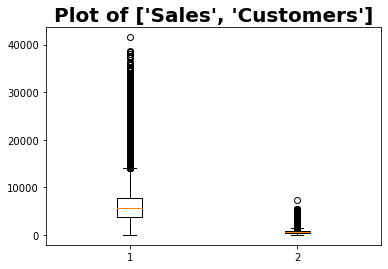

In [95]:
# Plotting to see outliers

DV.plot_box2(train_store,['Sales','Customers'])

##### From the above plot we can see that the customer and sales column has outliers